In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import tensorflow as tf

/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-pack

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: False


In [4]:
tf.enable_eager_execution()

In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/jugs/.keras/datasets/iris_training.csv


In [6]:
train_dataset_fp

'/home/jugs/.keras/datasets/iris_training.csv'

In [7]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [8]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [9]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [10]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

W1025 01:17:57.822054 140661363496768 deprecation.py:323] From /home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/data/experimental/ops/readers.py:499: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [11]:
train_dataset

<DatasetV1Adapter shapes: (OrderedDict([(sepal_length, (?,)), (sepal_width, (?,)), (petal_length, (?,)), (petal_width, (?,))]), (?,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [12]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=65, shape=(32,), dtype=float32, numpy=
array([4.8, 5.8, 5.1, 5.1, 4.6, 5.1, 6.1, 4.9, 6.4, 5.7, 6.3, 5. , 5.9,
       7.3, 6. , 7.9, 5.8, 5.4, 5.4, 5.1, 4.7, 7.4, 5.7, 6.4, 6.2, 5. ,
       5. , 5.2, 6.1, 4.6, 4.9, 5.6], dtype=float32)>), ('sepal_width', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([3. , 2.7, 3.8, 3.7, 3.1, 3.8, 2.6, 2.5, 3.2, 3. , 2.5, 3.3, 3.2,
       2.9, 2.9, 3.8, 4. , 3.9, 3. , 3.8, 3.2, 2.8, 4.4, 2.8, 2.8, 3.4,
       3. , 2.7, 3. , 3.6, 3.1, 2.9], dtype=float32)>), ('petal_length', <tf.Tensor: id=63, shape=(32,), dtype=float32, numpy=
array([1.4, 5.1, 1.6, 1.5, 1.5, 1.5, 5.6, 4.5, 5.3, 4.2, 5. , 1.4, 4.8,
       6.3, 4.5, 6.4, 1.2, 1.3, 4.5, 1.9, 1.6, 6.1, 1.5, 5.6, 4.8, 1.6,
       1.6, 3.9, 4.9, 1. , 1.5, 3.6], dtype=float32)>), ('petal_width', <tf.Tensor: id=64, shape=(32,), dtype=float32, numpy=
array([0.3, 1.9, 0.2, 0.4, 0.2, 0.3, 1.4, 1.7, 2.3, 1.2, 1.9, 0.2, 1.8,
       1.8, 1.5, 2. , 0.2, 0.4, 1

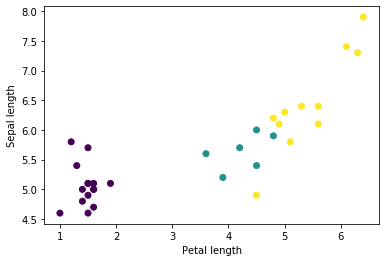

In [13]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [14]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [15]:
train_dataset = train_dataset.map(pack_features_vector)

In [16]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.8 3.  1.4 0.3]
 [5.8 2.7 5.1 1.9]
 [5.1 3.8 1.6 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.1 1.5 0.2]], shape=(5, 4), dtype=float32)


In [17]:
train_dataset

<DatasetV1Adapter shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [20]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=234, shape=(5, 3), dtype=float32, numpy=
array([[-0.85857487, -0.7958551 ,  0.34341604],
       [-1.7364534 , -1.305049  ,  1.0191413 ],
       [-1.0743359 , -1.0410893 ,  0.2608211 ],
       [-1.0987101 , -0.9921669 ,  0.3120109 ],
       [-0.8544393 , -0.84154797,  0.280583  ]], dtype=float32)>

In [21]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=240, shape=(5, 3), dtype=float32, numpy=
array([[0.18547845, 0.19748417, 0.61703736],
       [0.0547351 , 0.08426021, 0.86100465],
       [0.1713973 , 0.17719145, 0.6514113 ],
       [0.16099598, 0.17909609, 0.6599079 ],
       [0.19515173, 0.19768378, 0.60716444]], dtype=float32)>

In [23]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [0 2 0 0 0 0 2 2 2 1 2 0 1 2 1 2 0 0 1 0 0 2 0 2 2 0 0 1 2 0 0 1]


In [24]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.2890901565551758


In [26]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [28]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.2890901565551758
Step: 1,         Loss: 1.165595531463623


In [29]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    epoch_accuracy(y, model(x))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.100, Accuracy: 35.000%
Epoch 050: Loss: 0.075, Accuracy: 98.333%
Epoch 100: Loss: 0.052, Accuracy: 99.167%
Epoch 150: Loss: 0.044, Accuracy: 99.167%
Epoch 200: Loss: 0.040, Accuracy: 99.167%


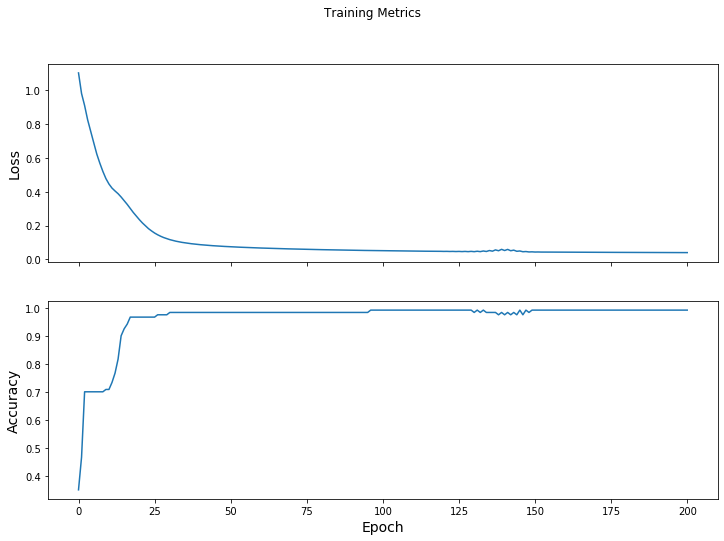

In [30]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [31]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [32]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [33]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [34]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=162189, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [35]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.9%)
Example 1 prediction: Iris versicolor (100.0%)
Example 2 prediction: Iris virginica (99.8%)


In [50]:
export_dir = "/tmp/jugs/1"
sess = tf.keras.backend.get_session()

tf.saved_model.simple_save(sess, 
                          export_dir, 
                          inputs= features,
                          outputs= labels)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
[v.name for v in model.inputs]

['dense_input:0']

In [45]:
[v.name for v in model.outputs]

['dense_2/Identity:0']